## Data Preparation

In [2]:
# Loading data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_csv(r'FastagFraudDetection.csv')
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [4]:
df.dtypes

Transaction_ID            int64
Timestamp                object
Vehicle_Type             object
FastagID                 object
TollBoothID              object
Lane_Type                object
Vehicle_Dimensions       object
Transaction_Amount        int64
Amount_paid               int64
Geographical_Location    object
Vehicle_Speed             int64
Vehicle_Plate_Number     object
Fraud_indicator          object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [6]:
from skimpy import skim

skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 5000   │ │ string      │ 9     │                                                          │
│ │ Number of columns │ 13     │ │ int32       │ 4     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA  ┃ NA %   ┃ mean   ┃ sd     ┃ p0  ┃ p25    ┃ p50   ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Transaction_ID           │   0 │      0 │   2500 │   1400 │   1 │   1300 │  2500 │  3800 │  5000 │ ▇▇▇▇▇▇  │  │
│ │ Transaction_Amount       │   0 │      0 │    160 │    110 │   0 │    100 │   130 │   290 │   350 │ ▃▆▇▁▁▆  │  │
│ │ Amount_paid              │   0 │      0 │    140 │    110 │   0 │     90 │   120 │   160 │   350 │ ▃▇▇▁▁▅  │  │
│ │ Vehicle_Speed            │   0 │      0 │     68 │     17 │  10 │     54 │    67 │    82 │   120 │   ▂▇▇▆  │  │
│ └──────────────────────────┴─────┴────────┴────────┴────────┴─────┴────────┴───────┴───────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA      ┃ NA %       ┃ words per row           ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Timestamp                           │       0 │          0 │                       2 │               10000 │  │
│ │ Vehicle_Type                        │       0 │          0 │                     1.1 │                5716 │  │
│ │ FastagID                            │     549 │      10.98 │                    0.89 │                4451 │  │
│ │ TollBoothID                         │       0 │          0 │                       1 │                5000 │  │
│ │ Lane_Type                           │       0 │          0 │                       1 │                5000 │  │
│ │ Vehicle_Dimensions                  │       0 │          0 │                       1 │                5000 │  │
│ │ Geographical_Location               │       0 │          0 │                       2 │               10000 │  │
│ │ Vehicle_Plate_Number                │       0 │          0 │                       1 │                5000 │  │
│ │ Fraud_indicator                     │       0 │          0 │                     1.8 │                9017 │  │
│ └─────────────────────────────────────┴─────────┴────────────┴─────────────────────────┴─────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

The FastagID column has 549 missing values, accounting for approximately 10.98% of the entries. This is significant and
could indicate issues with data collection or entry. Missing FastagIDs is a red flag for fraud.

### Dropping uncessary columns:

In [14]:
df = df.drop(columns=['Transaction_ID','Vehicle_Plate_Number', 'FastagID'], axis=1)

In [15]:
df.head(5)

,Timestamp,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Fraud_indicator
0,1/6/2023 11:20,Bus,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,Fraud
1,1/7/2023 14:55,Car,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,Fraud
2,1/8/2023 18:25,Motorcycle,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,Not Fraud
3,1/9/2023 2:05,Truck,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,Fraud
4,1/10/2023 6:35,Van,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,Fraud


### checking percentage of null values

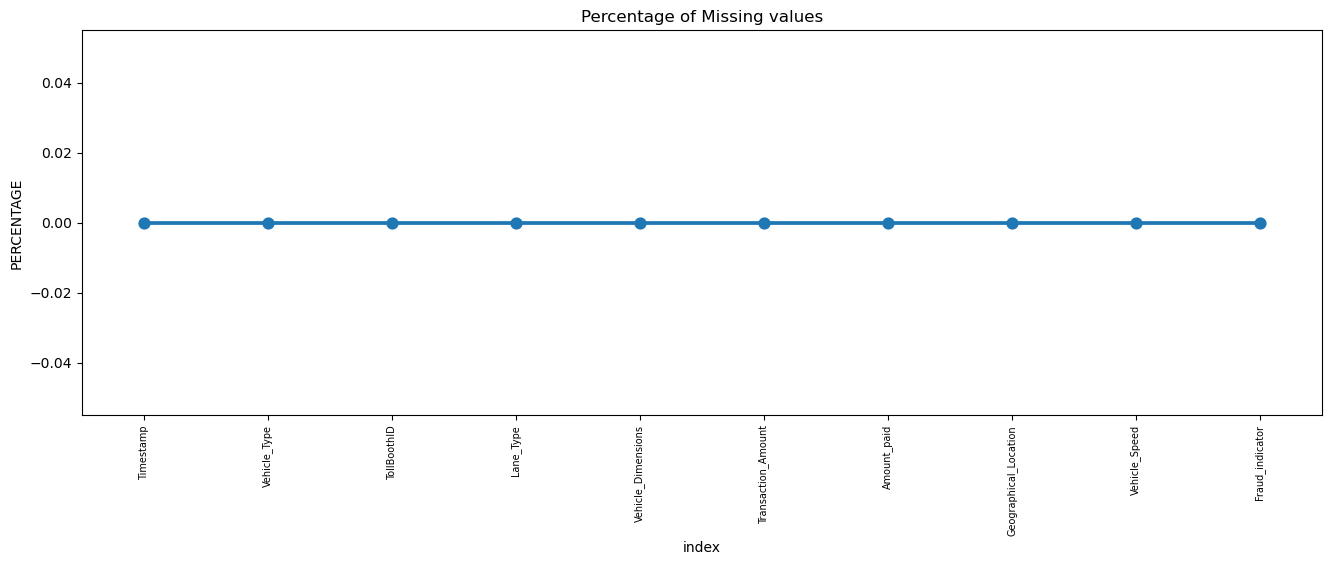

In [17]:

missing = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

No missing values in the dataset.

### checking for duplicates

In [18]:

df.duplicated().sum()

0

In [19]:
df.columns

Index(['Timestamp', 'Vehicle_Type', 'TollBoothID', 'Lane_Type',
       'Vehicle_Dimensions', 'Transaction_Amount', 'Amount_paid',
       'Geographical_Location', 'Vehicle_Speed', 'Fraud_indicator'],
      dtype='object')

### Renaming the columns

In [25]:
df_cleaned = df.rename(columns={'Timestamp':'Time','Vehicle_Type': 'Veh_Type','Vehicle_Dimensions': "Veh_Dimensions",'Transaction_Amount': 'Trans_Amount',
                                'Vehicle_Speed': 'Speed','Geographical_Location': 'Geo_location'})

In [26]:
df_cleaned.head(5)

,Time,Veh_Type,TollBoothID,Lane_Type,Veh_Dimensions,Trans_Amount,Amount_paid,Geo_location,Speed,Fraud_indicator
0,1/6/2023 11:20,Bus,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,Fraud
1,1/7/2023 14:55,Car,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,Fraud
2,1/8/2023 18:25,Motorcycle,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,Not Fraud
3,1/9/2023 2:05,Truck,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,Fraud
4,1/10/2023 6:35,Van,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,Fraud


### Save the cleaned dataframe

In [27]:
df_cleaned.to_csv("cleaned.csv", index=False)